In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# (1) Code up an algorithm the computes the feedforward step of a neural network.The neural network must have an input layer, a single hidden layer and an output layer.(You can add more hidden layers if you feel like it, but at least one is needed.)

## Weighted Sum function

In [2]:
def weighted_sum(x, w, b):
    """
    Compute the weighted sum of inputs.

    Parameters:
    x (numpy.ndarray): Input data.
    w (numpy.ndarray): Weights matrix.
    b (numpy.ndarray): Bias vector.

    Returns:
    numpy.ndarray or None: Weighted sum of inputs, or None if an error occurs.
    """
    try:
        w = w.transpose()
        z = np.dot(w, x) + b
        return z
    except Exception as e:
        # Handle exceptions, if any, and print an error message.
        print("An error occurred:", e)
        return


## Activation functions

In [3]:
def tanh(z):
    """
    Compute the hyperbolic tangent function.

    Parameters:
    z (numpy.ndarray): Input array.

    Returns:
    numpy.ndarray: Output of the hyperbolic tangent function.
    """
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

def sigmoid(z):
    """
    Compute the sigmoid function.

    Parameters:
    z (numpy.ndarray): Input array.

    Returns:
    numpy.ndarray: Output of the sigmoid function.
    """
    return 1 / (1 + np.exp(-z))

def relu(z):
    """
    Compute the ReLU (Rectified Linear Unit) function.

    Parameters:
    z (numpy.ndarray): Input array.

    Returns:
    numpy.ndarray: Output of the ReLU function.
    """
    z[z <= 0] = 0
    return z


## Get activation function

In [4]:
def feedforward_activation(input_x, weights, biases, activation='sigmoid'):
    """
    Perform a feedforward operation with an optional activation function.

    Parameters:
    input_x (numpy.ndarray): Input data.
    weights (numpy.ndarray): Weights for the feedforward operation.
    biases (numpy.ndarray): Biases for the feedforward operation.
    activation (str): Activation function to use ('sigmoid', 'tanh', or 'relu'). Default is 'sigmoid'.

    Returns:
    numpy.ndarray: Output of the feedforward operation with optional activation.
    """
    z = weighted_sum(input_x, weights, biases)
    # print(z)
    if activation == 'tanh':
        nodes = tanh(z)
    elif activation == 'sigmoid':
        nodes = sigmoid(z)
    elif activation == 'relu':
        nodes = relu(z)

    return nodes


## Feedforward function

In [5]:
def feedforward(input_x, weights, biases, hidden_layer_activation='sigmoid',
                output_activation='sigmoid', number_of_layers_excluding_input=1):
    """
    Perform a feedforward operation through the neural network.

    Parameters:
    input_x (numpy.ndarray): Input data.
    weights (list of numpy.ndarray): List of weight matrices for each layer.
    biases (list of numpy.ndarray): List of bias vectors for each layer.
    hidden_layer_activation (str): Activation function for hidden layers. Default is 'sigmoid'.
    output_activation (str): Activation function for the output layer. Default is 'sigmoid'.
    number_of_layers_excluding_input (int): Number of layers excluding input in the network. Default is 1.

    Returns:
    numpy.ndarray: Output of the feedforward operation.
    """
    # List to store the outputs of each layer
    layer_outputs = [feedforward_activation(input_x[0], weights[0], biases[0], hidden_layer_activation)]

    # Loop through each hidden layer
    if number_of_layers_excluding_input > 1:
        for num_layer in range(1, number_of_layers_excluding_input):

            # If not the last hidden layer
            if num_layer != number_of_layers_excluding_input-1:
                # Perform feedforward with hidden layer activation
                layer_outputs.append(feedforward_activation(layer_outputs[-1], weights[num_layer], biases[num_layer], hidden_layer_activation))
            else:
                # Perform feedforward with output layer activation for the last layer
                layer_outputs.append(feedforward_activation(layer_outputs[-1], weights[num_layer], biases[num_layer], output_activation))
    return layer_outputs[-1]

## Example 2.4.1

In [6]:
x=np.array([0.5,0.2])
w=np.array([[2,-4,0],[-1,3,1]])
b=np.array([0.2,-0.1,0.1])

feedforward([x], [w],[b])

array([0.73105858, 0.18242552, 0.57444252])

## Example 2.5.1

In [7]:
x=[np.array([2,1])]
w=[np.array([[2,1,-1],[-2,-4,1]]),np.array([[-2,3],[3,-1],[5,0]])]
b=[np.array([1,-1,2]),np.array([0,-1])]

feedforward(x, w,b,number_of_layers_excluding_input=2)

array([0.86903147, 0.85939771])

## Exercises

## (1) Consider a network with 4 input nodes, one hidden layer with 4 nodes and 2 output nodes. The weights between layer 0 and layer 1, and the biases at layer 1 are given by:

In [8]:
b=[np.array([1,-2,0,-1]),np.array([-2,2])]
w=[np.array([[4,-5,0,1],[-3,6,-1,2],[0,1,1,-2],[2,0,-3,4]]),np.array([[-2,1],[-1,0],[1,-3],[5,-1]])]

## 1. (a) Using the sigmoid activation function σ at each node, calculate the output from the network for the following inputs:

### (i) (1, 0, 2, −3)

In [9]:
x=[np.array([1,0,2,-3])]
feedforward(x, w,b,number_of_layers_excluding_input=2)

array([0.17586875, 0.32497344])

### (ii) (−2, 3, 1, 0)

In [10]:
x=[np.array([-2, 3, 1, 0])]
feedforward(x, w,b,number_of_layers_excluding_input=2)

array([0.68449258, 0.71327281])

### (iii) (1, 0, 1, 1)


In [11]:
x=[np.array([1, 0, 1, 1])]
feedforward(x, w,b,number_of_layers_excluding_input=2)

array([0.627741  , 0.85329519])

## (b) Using the activation function relu at each node, calculate the output from the net-work with same inputs as above.

### (i) (1, 0, 2, −3)

In [12]:
x=[np.array([1, 0, 2, -3])]
feedforward(x, w,b, hidden_layer_activation='relu', output_activation='relu',number_of_layers_excluding_input=2)

array([9, 0])

### (ii) (−2, 3, 1, 0)

In [13]:
x=[np.array([-2, 3, 1, 0])]
feedforward(x, w,b, hidden_layer_activation='relu', output_activation='relu',number_of_layers_excluding_input=2)

array([0, 1])

### (iii) (1, 0, 1, 1)


In [14]:
x=[np.array([1, 0, 1, 1])]
feedforward(x, w,b, hidden_layer_activation='relu', output_activation='relu',number_of_layers_excluding_input=2)

array([0, 7])

## (c) Using relu at the hidden layer and σ at the output layer, calculate the output from the network with same inputs as above.

### (i) (1, 0, 2, −3)

In [15]:
x=[np.array([1, 0, 2, -3])]
feedforward(x, w,b, hidden_layer_activation='relu',number_of_layers_excluding_input=2)

array([9.99876605e-01, 3.44247711e-14])

### (ii) (−2, 3, 1, 0)

In [16]:
x=[np.array([-2, 3, 1, 0])]
feedforward(x, w,b, hidden_layer_activation='relu',number_of_layers_excluding_input=2)

array([3.77513454e-11, 7.31058579e-01])

### (iii) (1, 0, 1, 1)

In [17]:
x=[np.array([1, 0, 1, 1])]
feedforward(x, w,b, hidden_layer_activation='relu',number_of_layers_excluding_input=2)

array([0.00247262, 0.99908895])

## (2) Consider a network with 2 input nodes, 3 nodes in the first hidden layer, 3 nodes in the second hidden layer and 2 output nodes. The weights between the respective layers are given by the following matrices:

In [18]:
w=[np.array([[1,-1,0],[-2,4,-1]]),np.array([[2,0,-1],[1,-2,-3],[5,0,0]]),np.array([[0,2],[-1,-1],[4,-3]])]

## The bias values at the two hidden layers and output layer are given by:

In [19]:
b=[np.array([0,-3,2]),np.array([3,3,-1]),np.array([0,1])]

###(a) Using the relu activation function at each node, calculate the output from the network for the following inputs:


#### (i) (1, −1)


In [20]:
x=[np.array([1,-1])]
feedforward(x, w,b, hidden_layer_activation='relu', output_activation='relu',number_of_layers_excluding_input=3)

array([ 0, 46])

#### (ii) (3, −2)


In [21]:
x=[np.array([3,-2])]
feedforward(x, w,b, hidden_layer_activation='relu', output_activation='relu',number_of_layers_excluding_input=3)

array([ 0, 72])

### (b) Using the sigmoid activation function σ at each node, calculate the output from the network with same inputs as above.


#### (i) (1, −1)


In [22]:
x=[np.array([1,-1])]
feedforward(x, w,b,number_of_layers_excluding_input=3)

array([0.38796133, 0.84221994])

#### (ii) (3, −2)

In [23]:
x=[np.array([3,-2])]
feedforward(x, w,b,number_of_layers_excluding_input=3)

array([0.38334351, 0.84414937])

In [24]:
# Example input data
input_x = [np.array([1, 2, 3])]

# Example weights and biases for each layer
weights = [
    np.array([[0.1, 0.2],[0.3,0.4], [0.5, 0.6]]),  # Weights for input to hidden layer 1
    np.array([[0.7, 0.8], [0.9, 1.0]]),            # Weights for hidden layer 1 to hidden layer 2
    np.array([[1.1, 1.2], [1.3, 1.4]]),            # Weights for hidden layer 2 to hidden layer 3
    np.array([[1.5],[1.6]])                        # Weights for hidden layer 3 to output layer
]

biases = [
    np.array([0.1, 0.2]),  # Biases for hidden layer 1
    np.array([0.3, 0.4]),  # Biases for hidden layer 2
    np.array([0.5, 0.6]),  # Biases for hidden layer 3
    np.array([0.7])        # Biases for output layer
]


feedforward(input_x, weights, biases, hidden_layer_activation='sigmoid',output_activation='sigmoid', number_of_layers_excluding_input=4)


array([0.97367562])

#(2) Please source the Iris DataSet from the UCI Machine Learning Repository.Create code to load this dataset into a input array X and and a target array T.Then change the target dataset to a one-hot encoding.

In [25]:
# Load the iris dataset
data = load_iris()
X = data['data']
T = data['target']

def one_hot_encoding(targets):
    # Get unique categories
    categories = np.unique(targets)
    # Get the number of categories
    number_of_categories = categories.size
    # Initialize an array to store the encoded target values
    encoded_T = np.array([list(np.zeros(number_of_categories, dtype=int)) for i in range(targets.size)])

    # Iterate through each target value and encode it
    for (i, t) in enumerate(targets):
        # Get the index of the category in the unique categories array
        category_index = list(categories).index(t)
        # Set the corresponding element in the encoded target array to 1
        encoded_T[i][category_index] = 1
    return encoded_T

# Print examples of category and its corresponding one-hot encoded value
print(f'category: {T[0]} , Encoded value : {one_hot_encoding(T)[0]}')
print(f'category: {T[60]} , Encoded value : {one_hot_encoding(T)[60]}')
print(f'category: {T[-1]} , Encoded value : {one_hot_encoding(T)[-1]}')


category: 0 , Encoded value : [1 0 0]
category: 1 , Encoded value : [0 1 0]
category: 2 , Encoded value : [0 0 1]


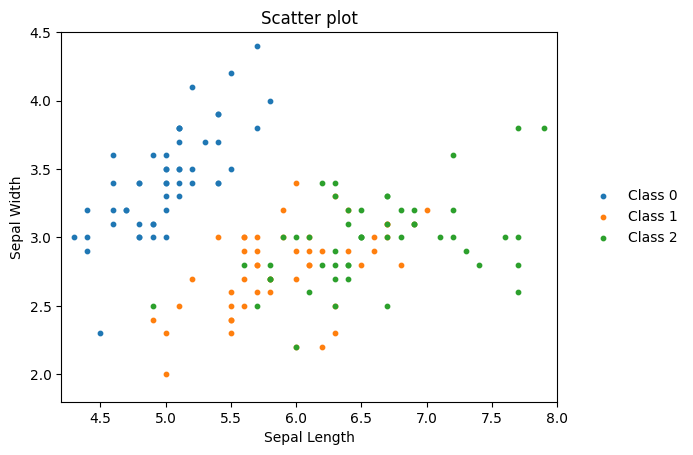

In [26]:
XNAME = 'sepal_length'
XLABEL = r'Sepal Length'
YNAME = 'sepal_width'
YLABEL = r'Sepal Width'
X_RANGE = (4.2, 8)
Y_RANGE = (1.8, 4.5)
STEP = 0.1

def plot_scatter(X, y, xname=XNAME, xlabel=XLABEL, yname=YNAME, ylabel=YLABEL, x_range=X_RANGE, y_range=Y_RANGE, step=STEP, title="Scatter plot"):

    fig, ax = plt.subplots()

    # Scatter each class separately
    for i in range(3):
        ax.scatter(X[y == i, 0], X[y == i, 1], marker='o', s=10, label=f'Class {i}')

    # Axes, legend and plot:
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", frameon=False)
    ax.set_title(title)
    plt.show()

plot_scatter(X, T)